In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


sigmoid activation function and its derivative 
soft max activation function for multi class output

In [87]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

initialising weights and biases

In [88]:
def initialize_parameters(input_size, hidden_size, binary_output_size, class_output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2_binary = np.random.randn(hidden_size, binary_output_size) * 0.01
    b2_binary = np.zeros((1, binary_output_size))
    W2_class = np.random.randn(hidden_size, class_output_size) * 0.01
    b2_class = np.zeros((1, class_output_size))
    return W1, b1, W2_binary, b2_binary, W2_class, b2_class

defining forward and backward propagation and computing the losses

In [89]:
def forward_propagation(X, W1, b1, W2_binary, b2_binary, W2_class, b2_class):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)

    Z2_binary = np.dot(A1, W2_binary) + b2_binary
    A2_binary = sigmoid(Z2_binary)

    Z2_class = np.dot(A1, W2_class) + b2_class
    A2_class = softmax(Z2_class)

    cache = {"Z1": Z1, "A1": A1, "Z2_binary": Z2_binary, "A2_binary": A2_binary, "Z2_class": Z2_class, "A2_class": A2_class}
    return A2_binary, A2_class, cache

def compute_binary_loss(y_binary, A2_binary):
    m = y_binary.shape[0]
    loss = -np.mean(y_binary * np.log(A2_binary) + (1 - y_binary) * np.log(1 - A2_binary))
    return loss

def compute_class_loss(y_class, A2_class):
    m = y_class.shape[0]
    loss = -np.mean(np.sum(y_class * np.log(A2_class), axis=1))
    return loss

def backward_propagation(X, y_binary, y_class, cache, W2_binary, W2_class):
    m = X.shape[0]
    A1 = cache["A1"]
    A2_binary = cache["A2_binary"]
    A2_class = cache["A2_class"]

    dZ2_binary = A2_binary - y_binary
    dW2_binary = np.dot(A1.T, dZ2_binary) / m
    db2_binary = np.sum(dZ2_binary, axis=0, keepdims=True) / m

    dZ2_class = A2_class - y_class
    dW2_class = np.dot(A1.T, dZ2_class) / m
    db2_class = np.sum(dZ2_class, axis=0, keepdims=True) / m

    dZ1 = np.dot(dZ2_binary, W2_binary.T) + np.dot(dZ2_class, W2_class.T)
    dZ1 *= sigmoid_derivative(cache["Z1"])
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1, "dW2_binary": dW2_binary, "db2_binary": db2_binary, "dW2_class": dW2_class, "db2_class": db2_class}
    return gradients

updating the parameters

In [90]:
def update_parameters(W1, b1, W2_binary, b2_binary, W2_class, b2_class, gradients, learning_rate):
    W1 -= learning_rate * gradients["dW1"]
    b1 -= learning_rate * gradients["db1"]
    W2_binary -= learning_rate * gradients["dW2_binary"]
    b2_binary -= learning_rate * gradients["db2_binary"]
    W2_class -= learning_rate * gradients["dW2_class"]
    b2_class -= learning_rate * gradients["db2_class"]
    return W1, b1, W2_binary, b2_binary, W2_class, b2_class

defining to train the dats set 

In [91]:
def train_neural_network(X, y_binary, y_class, hidden_size=64, learning_rate=0.01, epochs=100):
    input_size = X.shape[1]
    binary_output_size = 1
    class_output_size = y_class.shape[1]

    W1, b1, W2_binary, b2_binary, W2_class, b2_class = initialize_parameters(input_size, hidden_size, binary_output_size, class_output_size)
    losses = []

    for epoch in range(epochs):

        A2_binary, A2_class, cache = forward_propagation(X, W1, b1, W2_binary, b2_binary, W2_class, b2_class)

        binary_loss = compute_binary_loss(y_binary, A2_binary)
        class_loss = compute_class_loss(y_class, A2_class)
        total_loss = binary_loss + class_loss
        losses.append(total_loss)

        gradients = backward_propagation(X, y_binary, y_class, cache, W2_binary, W2_class)

        W1, b1, W2_binary, b2_binary, W2_class, b2_class = update_parameters(W1, b1, W2_binary, b2_binary, W2_class, b2_class, gradients, learning_rate)

                
    
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Total Loss')
    plt.title('Cost Convergence')
    plt.show()

    

    return W1, b1, W2_binary, b2_binary, W2_class, b2_class


predicting the testing data set 

In [92]:
def predict(X, W1, b1, W2_binary, b2_binary, W2_class, b2_class):
    A2_binary, A2_class, _ = forward_propagation(X, W1, b1, W2_binary, b2_binary, W2_class, b2_class)
    binary_predictions = (A2_binary > 0.5).astype(int)
    class_predictions = np.argmax(A2_class, axis=1)
    return binary_predictions, class_predictions

metrics

In [93]:
def f1_score(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    precision = tp / (tp + fp + 1e-8)
    recall = tp / (tp + fn + 1e-8)
    return 2 * (precision * recall) / (precision + recall + 1e-8)

training the data set

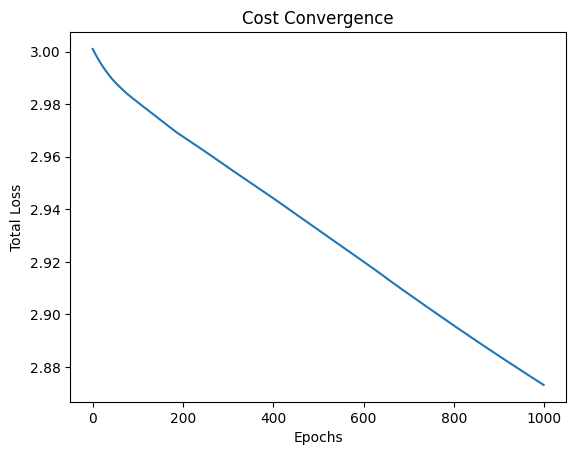

Binary Accuracy: 0.6069
Binary F1 Score: 0.6052
Class Accuracy: 0.2661


In [95]:

    file_path =  r"C:\Users\91944\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Desktop\ml\nn_train.csv"  # Replace with your dataset path
    data = pd.read_csv(file_path).drop(columns=['ID'])

    X = data.iloc[:, :-2].values 
    y_binary = data.iloc[:, -2].values.reshape(-1, 1)  
    y_class = pd.get_dummies(data.iloc[:, -1]).values 

    
    np.random.seed(42)
    indices = np.random.permutation(len(X))
    train_size = int(0.8 * len(X))
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_binary_train, y_binary_test = y_binary[train_indices], y_binary[test_indices]
    y_class_train, y_class_test = y_class[train_indices], y_class[test_indices]

    W1, b1, W2_binary, b2_binary, W2_class, b2_class = train_neural_network(X_train, y_binary_train, y_class_train, hidden_size=128, learning_rate=0.001, epochs=1000)

    binary_predictions, class_predictions = predict(X_test, W1, b1, W2_binary, b2_binary, W2_class, b2_class)

    binary_accuracy = np.mean(binary_predictions == y_binary_test)
    class_predictions_one_hot = np.zeros_like(y_class_test)
    class_predictions_one_hot[np.arange(len(class_predictions)), class_predictions] = 1
    class_accuracy = np.mean(np.all(class_predictions_one_hot == y_class_test, axis=1))

    binary_f1 = f1_score(y_binary_test.flatten(), binary_predictions.flatten())

    print(f"Binary Accuracy: {binary_accuracy:.4f}")
    print(f"Binary F1 Score: {binary_f1:.4f}")
    print(f"Class Accuracy: {class_accuracy:.4f}")